# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Enter API from OpenWeatherMap 
url = "http://api.openweathermap.org/data/2.5/weather?"
#Enter variables 
units ="metric"


#Build your url
query_url = f"{url}appid={api_key}&units={units}&q="
# Print the response object to the console

print(query_url)
response = requests.get(query_url)
print(response.json())

http://api.openweathermap.org/data/2.5/weather?appid=6d26f8fb1bee6ea03fe76dfeb0c83be2&units=metric&q=
{'cod': '400', 'message': 'Nothing to geocode'}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Looping through API, calling cities 
city_response = []
for city in cities[:10]:
    data = requests.get(query_url+city).json()
    #print(data)
    city_response.append(data)
print(city_response)

    

[{'coord': {'lon': 72.89, 'lat': 2.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 27.05, 'feels_like': 28.55, 'temp_min': 27.05, 'temp_max': 27.05, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 5.75, 'deg': 54}, 'rain': {'3h': 1.88}, 'clouds': {'all': 100}, 'dt': 1578599402, 'sys': {'country': 'MV', 'sunrise': 1578618969, 'sunset': 1578662080}, 'timezone': 18000, 'id': 1337607, 'name': 'Kudahuvadhoo', 'cod': 200}, {'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 29.56, 'temp_min': 26, 'temp_max': 26, 'pressure': 1012, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1578599402, 'sys': {'type': 1, 'id': 2188, 'country': 'GA', 'sunrise': 1578547605, 'sunset': 1578591376}, 'tim

In [ ]:
max_temp = data[main][temp_max]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
columns = city_response[0].keys()
weather_df = pd.DataFrame(city_response, columns=columns)
weather_df.head()


,coord,weather,base,main,wind,rain,clouds,dt,sys,timezone,id,name,cod
0,"{'lon': 72.89, 'lat': 2.67}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 27.05, 'feels_like': 28.55, 'temp_min...","{'speed': 5.75, 'deg': 54}",{'3h': 1.88},{'all': 100},1.578599e+09,"{'country': 'MV', 'sunrise': 1578618969, 'suns...",18000.0,1337607.0,Kudahuvadhoo,200
1,"{'lon': 8.78, 'lat': -0.72}","[{'id': 802, 'main': 'Clouds', 'description': ...",stations,"{'temp': 26, 'feels_like': 29.56, 'temp_min': ...","{'speed': 3.1, 'deg': 120}",NaN,{'all': 40},1.578599e+09,"{'type': 1, 'id': 2188, 'country': 'GA', 'sunr...",3600.0,2396518.0,Port-Gentil,200
2,"{'lon': 27.91, 'lat': -33.02}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 22, 'feels_like': 19.23, 'temp_min': ...","{'speed': 6.7, 'deg': 240}",NaN,{'all': 100},1.578599e+09,"{'type': 1, 'id': 1912, 'country': 'ZA', 'sunr...",7200.0,1006984.0,East London,200
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,404
4,"{'lon': -70.91, 'lat': -53.16}","[{'id': 804, 'main': 'Clouds', 'description': ...",stations,"{'temp': 8.27, 'feels_like': -1.44, 'temp_min'...","{'speed': 11.3, 'deg': 260}",NaN,{'all': 90},1.578599e+09,"{'type': 1, 'id': 8487, 'country': 'CL', 'sunr...",-10800.0,3874787.0,Punta Arenas,200


In [6]:
weather_df = pd.DataFrame()

weather_df["City"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Temperature"] = ""
weather_df["Humidity"] = ""
weather_df["cloudness"] = ""
weather_df["windspeed"] = ""

weather_df

,City,Latitude,Longitude,Temperature,Humidity,cloudness,windspeed


In [9]:
#Try and except Block

Index = 0


for city in cities:
    data = requests.get(query_url+city).json()
    try: 
        weather_df.loc[Index, "City"] = data["name"]
        weather_df.loc[Index,"Latitude"] = data["coord"]["lat"]
        weather_df.loc[Index, "Longitude"] = data["coord"]["lon"]
        weather_df.loc[Index, "Temperature"] = data["main"]["temp"]
        weather_df.loc[Index, "Humidity"] = data["main"]["humidity"]
        weather_df.loc[Index, "cloudness"] = data["clouds"]["all"]
        weather_df.loc[Index, "windspeed"] = data["wind"]["speed"]
        #Incrementing counter and Assigning as a print log
        Index = Index + 1
       
    except: 
        print("City not found")
        
    print("successfully found city " + city + "_" + str(Index))
    time.sleep(5)
    
weather_df



successfully found city kudahuvadhoo_1
successfully found city port-gentil_2
successfully found city east london_3
City not found
successfully found city korla_3
successfully found city punta arenas_4
successfully found city rikitea_5
successfully found city cape town_6
successfully found city cabo san lucas_7
successfully found city new norfolk_8
successfully found city yellowknife_9
successfully found city gat_10
successfully found city khatanga_11
successfully found city provideniya_12
successfully found city tuatapere_13
successfully found city butaritari_14
successfully found city vaini_15
successfully found city touros_16
successfully found city hilo_17
successfully found city pacifica_18
successfully found city lermontovka_19
successfully found city thompson_20
successfully found city codrington_21
successfully found city busselton_22
successfully found city puerto ayora_23
successfully found city mataura_24
successfully found city bredasdorp_25
successfully found city port eliz

successfully found city limon_191
successfully found city sungurlu_192
successfully found city cidreira_193
successfully found city mount gambier_194
successfully found city mezhova_195
City not found
successfully found city acara_195
successfully found city pacific grove_196
successfully found city dikson_197
successfully found city broome_198
successfully found city haines junction_199
City not found
successfully found city marcona_199
successfully found city avarua_200
successfully found city kruisfontein_201
successfully found city lagoa_202
successfully found city khor_203
successfully found city westport_204
successfully found city antofagasta_205
successfully found city muros_206
successfully found city gamba_207
successfully found city mar del plata_208
successfully found city kaitangata_209
successfully found city makakilo city_210
successfully found city fortuna_211
successfully found city cherskiy_212
successfully found city chapada dos guimaraes_213
successfully found city 

successfully found city turukhansk_391
successfully found city kloulklubed_392
successfully found city bati_393
successfully found city san patricio_394
successfully found city belyy yar_395
successfully found city barra patuca_396
City not found
successfully found city phnum penh_396
successfully found city ishigaki_397
City not found
successfully found city jiddah_397
successfully found city san nicolas_398
successfully found city portree_399
successfully found city talara_400
successfully found city otradnoye_401
successfully found city coquimbo_402
successfully found city coaldale_403
successfully found city port macquarie_404
successfully found city yar-sale_405
successfully found city berestechko_406
successfully found city arandis_407
successfully found city wladyslawowo_408
successfully found city jiangyou_409
successfully found city gayny_410
successfully found city luanda_411
City not found
successfully found city asau_411
successfully found city half moon bay_412
successfull

,City,Latitude,Longitude,Temperature,Humidity,cloudness,windspeed
0,Kudahuvadhoo,2.67,72.89,27.05,81,100,5.75
1,Port-Gentil,-0.72,8.78,26,88,40,1.5
2,East London,-33.02,27.91,22,68,100,6.7
3,Punta Arenas,-53.16,-70.91,7.92,65,90,11.3
4,Rikitea,-23.12,-134.97,24.97,83,84,9.43
...,...,...,...,...,...,...,...
551,Yermentau,51.62,73.1,-16.35,92,99,3.81
552,Semporna,4.48,118.61,25,94,75,1
553,Acajutla,13.59,-89.83,30.39,35,0,2.6
554,Kayes,14.44,-11.44,23.64,13,0,4.04


In [ ]:
# Save as a csv
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

In [10]:
#creating dataframe that will be pulling from CSV file:
climate_df = pd.read_csv("weather_data.csv")
climate_df.head()

,City,Latitude,Longitude,Temperature,Humidity,cloudness,windspeed
0,Bow Island,49.87,-111.38,2.17,80,90,10.80
1,Natal,-5.81,-35.21,27.00,74,20,4.60
2,Ushuaia,-54.81,-68.31,14.00,84,40,3.60
3,Mar del Plata,-46.43,-67.52,15.17,58,28,5.56
4,Bloomfield,40.75,-92.42,-0.13,69,1,3.10


#### Latitude vs. Temperature Plot

In [11]:
# Filter the DataFrame down only to Latitude and Temperature.
latitude_temperature = climate_df[["City","Latitude","Temperature"]]

# Set the index to be "State" so they will be used as labels
latitude_temperature = latitude_temperature.set_index("City")

latitude_temperature.head()

,Latitude,Temperature
City,,
Bow Island,49.87,2.17
Natal,-5.81,27.00
Ushuaia,-54.81,14.00
Mar del Plata,-46.43,15.17
Bloomfield,40.75,-0.13


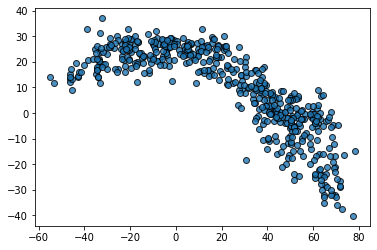

In [15]:

# Create a scatter plot which compares MPG to horsepower
#latitude_temperature.plot(kind="scatter",  x="Latitude", y="Temperature", grid=True, figsize=(10,10), ylim=(-50, 50),
                          #xlim=(-70, 100), title="City Latitude vs.Temperature")
plt.scatter(latitude_temperature ["Latitude"],latitude_temperature ["Temperature"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Saving graph as png
plt.savefig("Images/City_Lat_vs_Temp.png")
plt.show()



#### Latitude vs. Humidity Plot

In [16]:
# Filter the DataFrame down only to Latitude and Humidity.
latitude_Humidity = climate_df[["City","Latitude","Humidity"]]

# Set the index to be "State" so they will be used as labels
latitude_Humidity = latitude_Humidity.set_index("City")

latitude_Humidity.head()

,Latitude,Humidity
City,,
Bow Island,49.87,80
Natal,-5.81,74
Ushuaia,-54.81,84
Mar del Plata,-46.43,58
Bloomfield,40.75,69


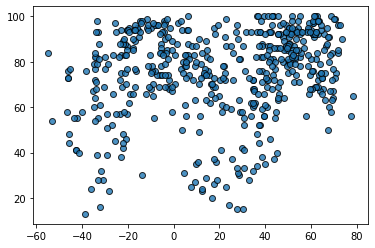

In [18]:


# Create a scatter plot which compares MPG to horsepower
#latitude_Humidity.plot(kind="scatter",  x="Latitude", y="Humidity", grid=True, figsize=(10,10), 
                       #ylim=(0, 120), xlim=(-70, 100), title="City Latitude vs.Humidity")

plt.scatter(latitude_Humidity ["Latitude"],latitude_Humidity ["Humidity"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Saving graph as png image
plt.savefig("Images/latitude_Humidity.png")
plt.show()


In [ ]:
# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("Images/latitude_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

In [19]:
# Filter the DataFrame down only to Latitude and Temperature.
latitude_cloudness = climate_df[["City","Latitude","cloudness"]]

# Set the index to be "State" so they will be used as labels
latitude_cloudness = latitude_cloudness.set_index("City")
  
latitude_cloudness.head()

,Latitude,cloudness
City,,
Bow Island,49.87,90
Natal,-5.81,20
Ushuaia,-54.81,40
Mar del Plata,-46.43,28
Bloomfield,40.75,1


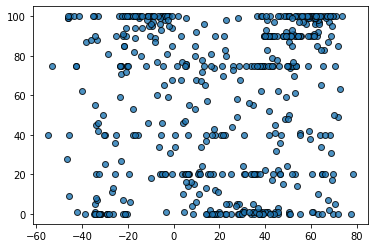

In [21]:
#set x and y limitis

# Create a scatter plot which compares MPG to horsepower
#latitude_cloudness.plot(kind="scatter",  x="Latitude", y="cloudness", grid=True, figsize=(10,10),
              #ylim=(-10, 110), xlim=(-70, 100), title="City Latitude vs.cloudness")
plt.scatter(latitude_cloudness["Latitude"],latitude_cloudness["cloudness"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.savefig("Images/latitude_cloudness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

In [22]:
# Filter the DataFrame down only to Latitude and Temperature.
latitude_windspeed = climate_df[["City","Latitude","windspeed"]]

# Set the index to be "State" so they will be used as labels
latitude_windspeed  = latitude_windspeed.set_index("City")

latitude_windspeed.head()

,Latitude,windspeed
City,,
Bow Island,49.87,10.80
Natal,-5.81,4.60
Ushuaia,-54.81,3.60
Mar del Plata,-46.43,5.56
Bloomfield,40.75,3.10


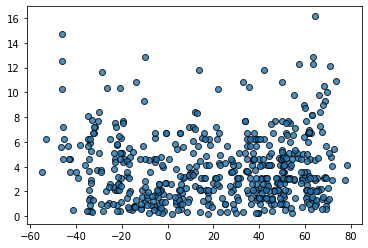

In [26]:
#set x and y limitis

# Create a scatter plot which compares MPG to horsepower
#latitude_windspeed.plot(kind="scatter",  x="Latitude", y="windspeed", grid=True, figsize=(10,10),
              #ylim=(-2,18), xlim=(-70, 100), title="City Latitude vs.windspeed")

plt.scatter(latitude_windspeed["Latitude"],latitude_windspeed["windspeed"], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.savefig("Images/latitude_windspeed.png")
plt.show()